In [1]:
#loading Dataset

import seaborn as sns
import pandas as pd

data = sns.load_dataset('planets') #loading dataset
print('first few rows') #print first few rows of dataset
print(data.head())

print('statistics') #summary statistics of data
print(data.describe())

print('null value check') #check for null values
data.isnull().mean()

first few rows
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
statistics
            number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.000000        0.090706    0.003600     1.350000  1989.000000
25%       1.000000        5.442540    0.229000    32.560000  2007.000000
50%       1.000000       39.979500    1.260000    55.250000  2010.000000
75%       2.000000      526.005000    3.040000   178.500000  2012.0

method            0.000000
number            0.000000
orbital_period    0.041546
mass              0.504348
distance          0.219324
year              0.000000
dtype: float64

Counter({'Radial Velocity': 553, 'Transit': 397, 'Imaging': 38, 'Microlensing': 23, 'Eclipse Timing Variations': 9, 'Pulsar Timing': 5, 'Transit Timing Variations': 4, 'Orbital Brightness Modulation': 3, 'Astrometry': 2, 'Pulsation Timing Variations': 1})


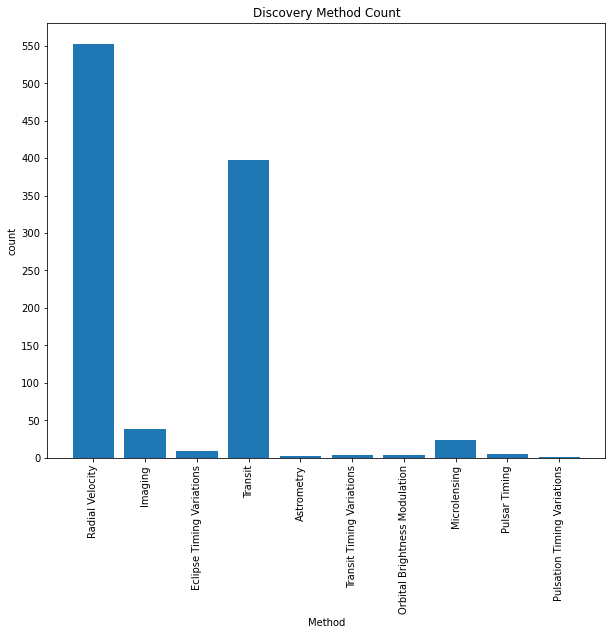

In [2]:
#exploratory data analysis
from collections import Counter

items = Counter(data['method']) #counting discovery methods
print(items)

#plotting count
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,8))
plt.title('Discovery Method Count')
plt.xlabel('Method')
plt.ylabel('count')
plt.xticks(rotation=90)
y_ticks = (np.arange(0,600, step=50))
plt.yticks(ticks = y_ticks)
plt.bar(items.keys(), items.values() )
plt.show()




<function matplotlib.pyplot.show(close=None, block=None)>

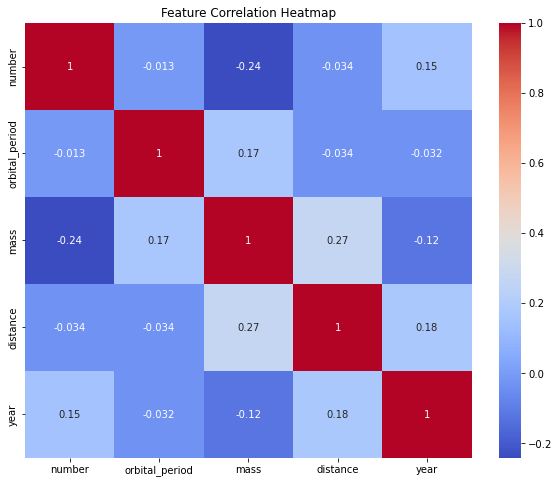

In [3]:
#numeric data correlation heatmap
#This type of graph allows us to see correlations between variables within a dataset
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(),cmap ='coolwarm' , annot =True)
plt.title('Feature Correlation Heatmap')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

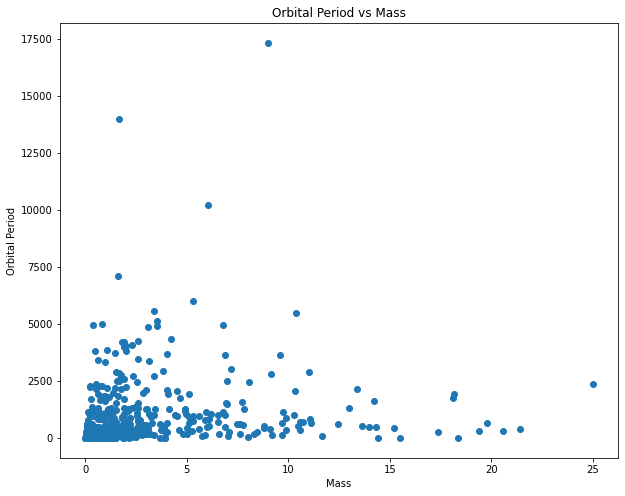

In [4]:
#Mass against Distance

plt.figure(figsize=(10,8))
x = data['mass']
y = data['orbital_period']
plt.xlabel('Mass')
plt.ylabel('Orbital Period')
plt.title('Orbital Period vs Mass')
plt.scatter(x, y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

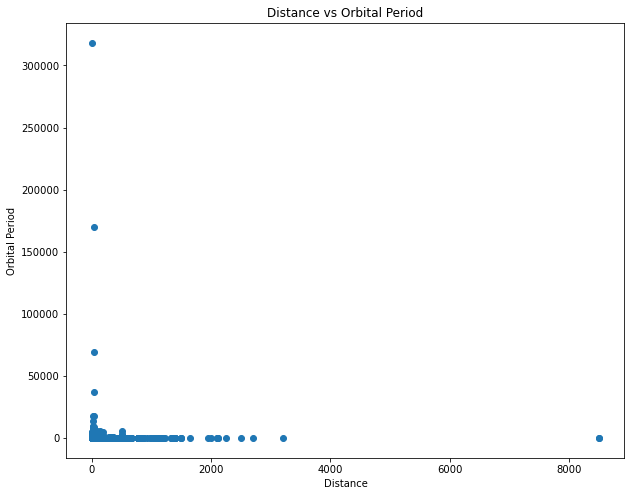

In [5]:
#Orbital Period vs Distance

plt.figure(figsize=(10,8))
x = data['distance']
y = data['orbital_period']
plt.xlabel('Distance')
plt.ylabel('Orbital Period')
plt.title('Distance vs Orbital Period')
plt.scatter(x, y)
plt.show

In [6]:
#Data cleaning and Feature Engineering

#removal of null values
data_cleaned = data.dropna()


In [7]:
#converting categorical variables to numeric

data_cleaned = pd.get_dummies(data_cleaned, columns=['method'], drop_first=False)
print(data_cleaned)

     number  orbital_period    mass  distance  year  method_Radial Velocity  \
0         1       269.30000   7.100     77.40  2006                       1   
1         1       874.77400   2.210     56.95  2008                       1   
2         1       763.00000   2.600     19.84  2011                       1   
3         1       326.03000  19.400    110.62  2007                       1   
4         1       516.22000  10.500    119.47  2009                       1   
..      ...             ...     ...       ...   ...                     ...   
640       1       111.70000   2.100     14.90  2009                       1   
641       1         5.05050   1.068     44.46  2013                       1   
642       1       311.28800   1.940     17.24  1999                       1   
649       1         2.70339   1.470    178.00  2013                       0   
784       3       580.00000   0.947    135.00  2012                       1   

     method_Transit  
0                 0  
1      

In [18]:
#splitting into training and test set
#in this instance we want to predict whether the method was radial velocity

X = data_cleaned.drop(columns = 'method_Radial Velocity')
Y = data_cleaned['method_Radial Velocity']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, )

In [9]:
Y.unique()

array([1, 0], dtype=uint8)

In [19]:
#Building a simple logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#normalizing data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, Y_train)



LogisticRegression(class_weight='balanced')

In [20]:
#Making predictions on the model
Y_pred = model.predict(X_test)

#evaluation of model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_pred, Y_test)
print('accuracy:', accuracy)

accuracy: 1.0


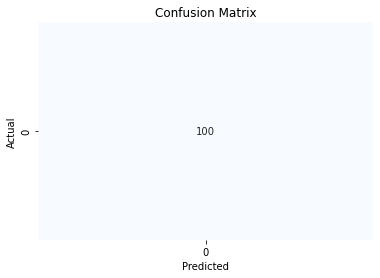

In [23]:
#visualising the model using a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The above matrix shows that the actual values are on the y axis (Actual) and the predicted values are on the x axis (Predicted). It shows that the model predicted 0 for all instances and that these 100 predictions were correct. NO other cells were populated mean that the model didn't predict any instances where the other class was 1. There were no misclassifications.

This could be occuring due to an imbalanced dataset meaning there are more examples where the class label is 0 than 1. The model may be biased to the class as a result of this imbalance of data.